In [50]:
import os #RICK STUFF
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import pydot
from io import StringIO
from sklearn.tree import export_graphviz

In [51]:
df = pd.read_csv('STUDENT.csv')

In [52]:
# Task 1.1
df['G3'].value_counts()

PASS    661
FAIL    383
Name: G3, dtype: int64

In [53]:
# Task 1.2
def preprocess():
    import pandas as pd
    #Preprocess data
    df_raw = pd.read_csv('STUDENT.csv', index_col=0)
    df = df_raw.drop(['InitialName', 'guardian'], axis=1)
    
    # Map binaries
    df['address'] = df['address'].map({ 'U':0, 'R':1 })
    df['sex'] = df['sex'].map({ 'M':0, 'F':1 })
    df['famsize'] = df['famsize'].map({ 'LE3':0, 'GT3':1 })
    df['Pstatus'] = df['Pstatus'].map({ 'A':0, 'T':1 })
    df['schoolsup'] = df['schoolsup'].map({ 'no':0, 'yes':1 })
    df['famsup'] = df['famsup'].map({ 'no':0, 'yes':1 })
    df['paid'] = df['paid'].map({ 'no':0, 'yes':1 })
    df['activities'] = df['activities'].map({ 'no':0, 'yes':1 })
    df['nursery'] = df['nursery'].map({ 'no':0, 'yes':1 })
    df['higher'] = df['higher'].map({ 'no':0, 'yes':1 })
    df['internet'] = df['internet'].map({ 'no':0, 'yes':1 })
    df['romantic'] = df['romantic'].map({ 'no':0, 'yes':1 })
    df['G3'] = df['G3'].map({ 'FAIL': 0, 'PASS': 1 })

    # Fill via median for age
    df['age'].fillna(df['age'].median(), inplace=True)
    
    # Fill via 'none' since hot encode will flag
    df['school'].fillna('none', inplace=True)
    df['reason'].fillna('none', inplace=True)

    # Task 1.3
    #Drop g1 & 2 empty rows
    df = df.drop(['G1', 'G2', 'failures'], axis=1)

    # Hot encode
    df = pd.get_dummies(df)
    return df

In [54]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_

    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]
    for i in indices:
        print(feature_names[i], ':', importances[i])
        
def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file CHANGED TO ACCESS INDEX

In [55]:
df = preprocess()

In [7]:
#
# Start of Task 2
#

In [8]:
# Task 2.1
y = df['G3']
x = df.drop(['G3'], axis=1)

# set seed for randomisation
rs = 10

# Convert x into numpy matrix for sklearn consumption
x_mat = x.as_matrix()
# Setup training and test datasets on a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.3, stratify=y, random_state=rs)

# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(x_train, y_train)

# Check accuracy on the training sets
print("Train accuracy:", model.score(x_train, y_train))
# Check accuracy on the test sets
print("Test accuracy:", model.score(x_test, y_test))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

# Check which features have the largest impact on the decision tree?

# grab feature importances from the model and feature name from the original x
importances = model.feature_importances_
feature_names = x.columns

# sort in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 5 features
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', importances[i])
    
# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=x.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("default_decision.png") # CHANGED TO ACCESS [0] element

C:\Users\rickm\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Train accuracy: 0.9972602739726028
Test accuracy: 0.589171974522293
             precision    recall  f1-score   support

          0       0.45      0.50      0.47       115
          1       0.69      0.64      0.66       199

avg / total       0.60      0.59      0.59       314

absences : 0.09560916279923631
higher : 0.06658724391357355
age : 0.06262717342173142
Fedu : 0.05760027257597375
traveltime : 0.043278515973278565


In [9]:
# Task 2.2
print("Wide search to find optimal depth and leaf range:\n")
# grid search CV 1
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 10),
 'min_samples_leaf': range(20, 60, 10)}
cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),cv=10)
cv.fit(x_train, y_train)
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
# test the best model
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)


print("\n\n\nSpecified search to find optimal depth and leaf:\n")
# grid search CV 2
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 10),
 'min_samples_leaf': range(24, 37)}
cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),cv=10)
cv.fit(x_train, y_train)
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
# test the best model
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

# print the feature importance and save the decision tree
analyse_feature_importance(cv.best_estimator_, x.columns, 5)
visualize_decision_tree(cv.best_estimator_, x.columns, "optimal_decision.png")

Wide search to find optimal depth and leaf range:

Train accuracy: 0.7219178082191781
Test accuracy: 0.6592356687898089
             precision    recall  f1-score   support

          0       0.54      0.50      0.52       115
          1       0.72      0.75      0.74       199

avg / total       0.65      0.66      0.66       314

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 30}



Specified search to find optimal depth and leaf:

Train accuracy: 0.7178082191780822
Test accuracy: 0.643312101910828
             precision    recall  f1-score   support

          0       0.51      0.51      0.51       115
          1       0.72      0.72      0.72       199

avg / total       0.64      0.64      0.64       314

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 34}
higher : 0.3133028333660085
school_DCHS : 0.131807588885754
absences : 0.11448145286961198
Fedu : 0.1088873310214518
traveltime : 0.07112199333165148


In [72]:
#
# Start of Task 3
#

In [73]:
# Task 3.1
# Scale all data to have a mean of 0
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train, y_train)
x_test = scaler.transform(x_test)

In [74]:
# Task 3.2 default
model = LogisticRegression(random_state=rs)
# fit it to training data
model.fit(x_train, y_train)
print(model)
print("\n\n")


# training and test accuracy
print("Train accuracy:", model.score(x_train, y_train))
print("Test accuracy:", model.score(x_test, y_test))
# classification report on test data
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


feature_names = x.columns
coef = model.coef_[0]
# limit to 5 features
coef = coef[:5]
for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



Train accuracy: 0.7342465753424657
Test accuracy: 0.678343949044586
             precision    recall  f1-score   support

          0       0.65      0.27      0.38       115
          1       0.68      0.91      0.78       199

avg / total       0.67      0.68      0.64       314

sex : 0.24312747646020103
age : -0.265783752588213
address : -0.0043420897777754885
famsize : -0.061954211352185144
Pstatus : -0.055655817303887155


In [75]:
# Taks 3.2 optimal
# grid search CV
params = {'C': [pow(10, x) for x in range(-8, 6)]}
# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),cv=10, n_jobs=-1)
cv.fit(x_train, y_train)
print(cv)
print("\n\n")
# test the best model
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)
print("\n\n")

# feature importance
coef = cv.best_estimator_.coef_[0]
feature_names = x.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 5 features
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', coef[i])


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Train accuracy: 0.7342465753424657
Test accuracy: 0.6751592356687898
             precision    recall  f1-score   support

          0       0.62      0.29      0.39       115
          1       0.69      0.90      0.78       199

avg / total       0.66      0.68      0.64       314

{'C': 0.01}



higher : 0.23371581544712686
Fedu : 0.16426050370065096
studytime : 0.15784615743174435
schoolsup : -0.14956293036

In [76]:
#
# Reasoning for log transformation
#

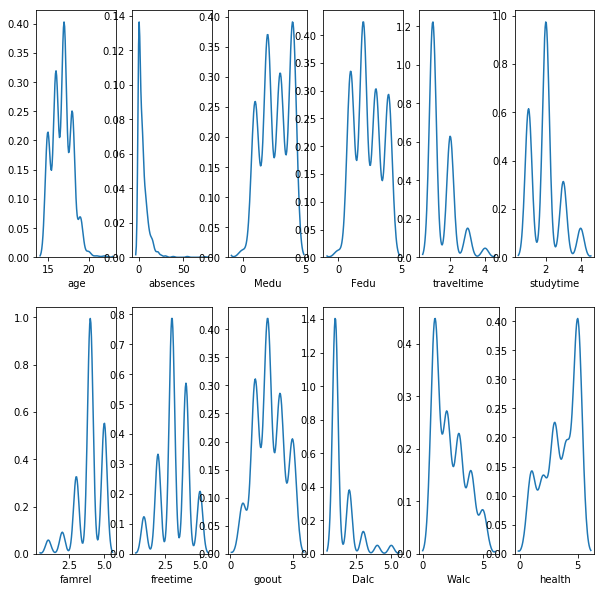

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(2,6, figsize=(10,10), sharex=False)
    # gift avg plots
    sns.distplot(df['age'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['absences'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['Medu'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['Fedu'].dropna(), hist=False, ax=axes[0,3])
    sns.distplot(df['traveltime'].dropna(), hist=False, ax=axes[0,4])
    sns.distplot(df['studytime'].dropna(), hist=False, ax=axes[0,5])
    sns.distplot(df['famrel'].dropna(), hist=False, ax=axes[1,0])
    sns.distplot(df['freetime'].dropna(), hist=False, ax=axes[1,1])
    sns.distplot(df['goout'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['Dalc'].dropna(), hist=False, ax=axes[1,3])
    sns.distplot(df['Walc'].dropna(), hist=False, ax=axes[1,4])
    sns.distplot(df['health'].dropna(), hist=False, ax=axes[1,5])
    plt.show()

plot_skewed_columns(df)

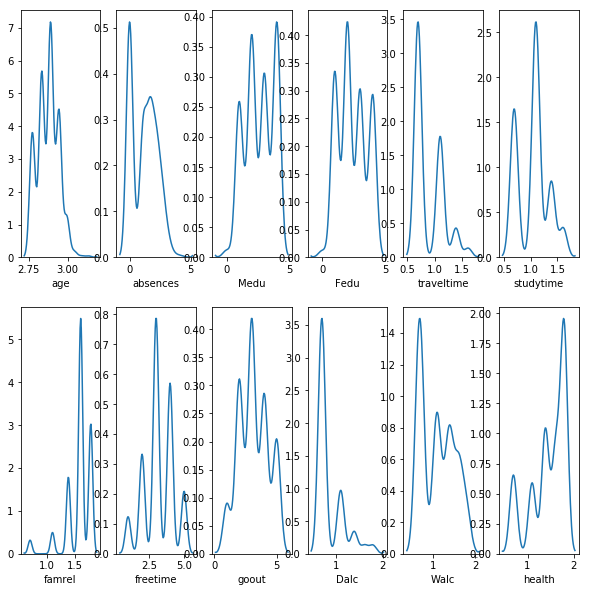

In [78]:
import numpy as np
# list columns to be transformed
columns_to_transform = ['absences', 'age', 'traveltime', 'studytime', 'famrel', 'Dalc', 'Walc', 'health']
# copy the dataframe
df_log = df.copy()
# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)
# plot them again to show the distribution
plot_skewed_columns(df_log)

In [79]:
y_log = df_log['G3']
x_log = df_log.drop(['G3'], axis=1)
x_mat_log = x_log.as_matrix()
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_mat_log, y_log, test_size=0.3, 
                                                                    stratify=y_log, random_state=rs)
# standardise them again
scaler_log = StandardScaler()
x_train_log = scaler_log.fit_transform(x_train_log, y_train_log)
x_test_log = scaler_log.transform(x_test_log)

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
cv=10, n_jobs=-1)
cv.fit(x_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(x_train_log, y_train_log))
print("Test accuracy:", cv.score(x_test_log, y_test_log))

y_pred = cv.predict(x_test_log)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

C:\Users\longs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Train accuracy: 0.7301369863013699
Test accuracy: 0.6656050955414012
             precision    recall  f1-score   support

          0       0.56      0.43      0.48       115
          1       0.71      0.80      0.75       199

avg / total       0.65      0.67      0.65       314

{'C': 0.1}


In [80]:
#
# Log transformations decrease accuracy and therefore are not being implemented for optimal solution
#

In [81]:
# Task 3.3
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(x_train, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", x_train.shape[1])
print("Number of features after elimination", rfe.n_features_)
print("\n")

x_train_sel = rfe.transform(x_train)
x_test_sel = rfe.transform(x_test)

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
cv=10, n_jobs=-1)
cv.fit(x_train_sel, y_train)
# test the best model
print("Train accuracy:", cv.score(x_train_sel, y_train))
print("Test accuracy:", cv.score(x_test_sel, y_test))
y_pred = cv.predict(x_test_sel)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)
print("\n\n")

# feature importance
coef = cv.best_estimator_.coef_[0]
feature_names = x.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# dont limit so to see what variables are remaining
for i in indices:
    print(feature_names[i], ':', coef[i])

Original feature set 42
Number of features after elimination 8


Train accuracy: 0.7246575342465753
Test accuracy: 0.6878980891719745
             precision    recall  f1-score   support

          0       0.68      0.28      0.40       115
          1       0.69      0.92      0.79       199

avg / total       0.69      0.69      0.65       314

{'C': 0.01}



Pstatus : 0.2595454491630875
age : 0.20186423266937287
traveltime : 0.18888114692732907
address : 0.16474360107256247
Medu : -0.15674241032230224
famsize : -0.14083837845407712
sex : -0.13913099704037243
Fedu : -0.1287181174041428


In [82]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(x_train_log, y_train_log) # run the RFECV on log transformed dataset
# comparing how many variables before and after
print("Original feature set", x_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)
# select features from log transformed dataset
x_train_sel_log = rfe.transform(x_train_log)
x_test_sel_log = rfe.transform(x_test_log)
# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
cv=10, n_jobs=-1)
cv.fit(x_train_sel_log, y_train_log)
# test the best model
print("Train accuracy:", cv.score(x_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(x_test_sel_log, y_test_log))
y_pred_log = cv.predict(x_test_sel_log)
print(classification_report(y_test_log, y_pred_log))
# print parameters of the best model
print(cv.best_params_)

Original feature set 42
Number of features after elimination 36
Train accuracy: 0.7232876712328767
Test accuracy: 0.6624203821656051
             precision    recall  f1-score   support

          0       0.55      0.43      0.49       115
          1       0.71      0.79      0.75       199

avg / total       0.65      0.66      0.65       314

{'C': 0.01}


In [25]:
#
# Start of Task 4
#

In [27]:
# Task 4 Prep
# Reset and scale vals
y = df['G3']
x = df.drop(['G3'], axis=1)
x_mat = x.as_matrix()
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.3, stratify=y, random_state=rs)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train, y_train)
x_test = scaler.transform(x_test)

C:\Users\rickm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [42]:
# Task 4.1.a
# NN with default settings
# Given that the network cant converge with max_iter=200 set to best val so reasonable outputs obtained
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=327, random_state=rs)
model.fit(x_train, y_train)

print("Train accuracy:", model.score(x_train, y_train))
print("Test accuracy:", model.score(x_test, y_test))
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(model)

Train accuracy: 0.9904109589041096
Test accuracy: 0.6656050955414012
             precision    recall  f1-score   support

          0       0.54      0.53      0.54       115
          1       0.73      0.74      0.74       199

avg / total       0.66      0.67      0.66       314

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=327, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [61]:
# Task 4.1.b
# NN with GridSearchCV settings
params = {'hidden_layer_sizes': [(x,) for x in range(3, 43, 20)]}
cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=591, random_state=rs), cv=10, n_jobs=-1)
cv.fit(x_train, y_train)
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)
print(cv)

Train accuracy: 0.7945205479452054
Test accuracy: 0.6687898089171974
             precision    recall  f1-score   support

          0       0.56      0.47      0.51       115
          1       0.72      0.78      0.75       199

avg / total       0.66      0.67      0.66       314

{'hidden_layer_sizes': (3,)}
GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=591, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(3,), (23,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, ve

In [59]:
# Task 4.2.i
# NN with GridSearchCV settings
# Revolve around range 3
params = {'hidden_layer_sizes': [(x,) for x in range(1, 13)]}
cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=591, random_state=rs), cv=10, n_jobs=-1)
cv.fit(x_train, y_train)
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.7945205479452054
Test accuracy: 0.6687898089171974
             precision    recall  f1-score   support

          0       0.56      0.47      0.51       115
          1       0.72      0.78      0.75       199

avg / total       0.66      0.67      0.66       314

{'hidden_layer_sizes': (3,)}


In [60]:
# Task 4.1.b.ii
# NN with GridSearchCV settings
# Find optimal alpha on range 3
params = {'hidden_layer_sizes': [(3)], 'alpha': [0.01,0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]}
cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=591, random_state=rs), cv=10, n_jobs=-1)
cv.fit(x_train, y_train)
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.7945205479452054
Test accuracy: 0.6656050955414012
             precision    recall  f1-score   support

          0       0.55      0.46      0.50       115
          1       0.72      0.78      0.75       199

avg / total       0.66      0.67      0.66       314

{'alpha': 1e-06, 'hidden_layer_sizes': 3}


In [23]:
# Task 4.3